---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [43]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [5]:
pd.__version__

'1.1.4'

In [6]:
np.__version__

'1.19.3'

In [44]:
def Q1() :
    energy = pd.read_excel('Energy Indicators.xls',skiprows=17,skipfooter=38)   

    # select and rename columns
    energy = energy.iloc[:,2:] # select tail 4 columns 
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    
    # treat '...'values
    energy = energy[['Country','Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN)

    # replace Country name  
    energy = energy.replace({'Country' : r'[\d]+'},{'Country' : ''},regex=True )  # remove CountryName with digitS
    energy = energy.replace({r'\(.*\)' : ' '}, regex=True )   # remove CountryName with ()
    energy = energy.replace(
        {'Country':{"Republic of Korea": "South Korea",
                    "United States of America": "United States",
                    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                    "China, Hong Kong Special Administrative Region": "Hong Kong"}
        })
    
    # GDP From World bank
    GDP = pd.read_csv('world_bank.csv',skiprows=4)
    GDP = GDP.rename(columns={'Country Name':'Country'})
    GDP = GDP.replace({'Country':{"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran","Hong Kong SAR, China": "Hong Kong"}})
    GDP = GDP[['Country','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

    ScimEn = pd.read_excel('scimagojr-3.xlsx')  # 1996-2019
    ScimEn = ScimEn.iloc[:16,:] # Select Rank top 16. Taiwan is excluded in 'energy' dataset  
    
    # merge data
    data = pd.merge(ScimEn,energy, how='inner').drop(columns='Region')
    data = data.merge(GDP, how='left').set_index('Country')
    return data
Q1()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
United States,1,157811,154288,1940563,639345,12.30,333,90838.0,286.0,11.570980,1.381461e+13,1.445186e+13,1.471284e+13,1.444893e+13,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752175e+13,1.821930e+13
China,2,235126,233883,1909601,1306438,8.12,224,127191.0,93.0,19.754910,2.752132e+12,3.550342e+12,4.594307e+12,5.101702e+12,6.087165e+12,7.551500e+12,8.532231e+12,9.570406e+12,1.047568e+13,1.106155e+13
Canada,3,29633,29011,491467,88987,16.59,210,10431.0,296.0,61.945430,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.828689e+12,1.847209e+12,1.803533e+12,1.556130e+12
United Kingdom,4,38873,37780,536378,100038,13.80,208,7920.0,124.0,10.600470,2.713750e+12,3.100882e+12,2.922667e+12,2.410910e+12,2.475244e+12,2.659310e+12,2.704888e+12,2.786023e+12,3.063803e+12,2.928591e+12
Germany,5,32935,32227,367356,78265,11.15,186,13261.0,165.0,17.901530,2.992197e+12,3.421229e+12,3.730028e+12,3.397791e+12,3.396354e+12,3.744409e+12,3.527345e+12,3.732743e+12,3.883920e+12,3.360550e+12
Japan,6,46032,45559,436961,109968,9.49,181,18984.0,149.0,10.232820,4.530377e+12,4.515265e+12,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12
India,7,39893,38848,368175,123446,9.23,171,33195.0,26.0,14.969080,9.402599e+11,1.216735e+12,1.198896e+12,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12
France,8,22429,21913,300015,58151,13.38,169,10597.0,166.0,17.020280,2.318594e+12,2.657213e+12,2.918383e+12,2.690222e+12,2.642610e+12,2.861408e+12,2.683825e+12,2.811078e+12,2.852166e+12,2.438208e+12
Spain,9,18882,18529,312632,56968,16.56,163,4923.0,106.0,37.968590,1.259344e+12,1.472131e+12,1.625225e+12,1.485583e+12,1.420722e+12,1.478773e+12,1.324820e+12,1.354757e+12,1.369399e+12,1.195119e+12


In [8]:
# Method Chaining style 
# ref: https://towardsdatascience.com/using-pandas-method-chaining-to-improve-code-readability-d8517c5626ac

energy =(
    pd.read_excel('Energy Indicators.xls',skiprows=17,skipfooter=38)
 # select , rename columns
 .iloc[:,2:] # select tail 4 columns
 .rename(columns={'Unnamed: 2':'Country', 'Petajoules':'Energy Supply', 'Gigajoules':'Energy Supply per Capita', '%':'% Renewable'})
 
 
# treat ...values
 [['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN)

# replace Country name  !!注意字串資料處理 使用regex=True 
 .replace({'Country' : r'[\d]+'},{'Country' : ''},regex=True )   # remove CountryName with digitS
 .replace({r'\(.*\)' : ' '}, regex=True )  # remove CountryName with ()
 
 .replace(
    {'Country':{"Republic of Korea": "South Korea","United States of America": "United States","United Kingdom of Great Britain and Northern Ireland": "United Kingdom","China, Hong Kong Special Administrative Region": "Hong Kong"}
 })

)
energy
# energy[energy['Country'].str.contains(' \(')]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321.0,10.0,78.669280
1,Albania,102.0,35.0,100.000000
2,Algeria,1959.0,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.0,121.0,88.695650
...,...,...,...,...
222,Viet Nam,2554.0,28.0,45.321520
223,Wallis and Futuna Islands,0.0,26.0,0.000000
224,Yemen,344.0,13.0,0.000000
225,Zambia,400.0,26.0,99.714670


In [ ]:
# Method Chaining style 
# ref: https://towardsdatascience.com/using-pandas-method-chaining-to-improve-code-readability-d8517c5626ac



energy =(
    pd.read_excel('Energy Indicators.xls',skiprows=17,skipfooter=38)
 # select , rename columns
 .iloc[:,2:] # select tail 4 columns
 .rename(columns={'Unnamed: 2':'Country', 'Petajoules':'Energy Supply', 'Gigajoules':'Energy Supply per Capita', '%':'% Renewable'})
 
 
# treat ...values
 [['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN)

# replace Country name  !!注意字串資料處理 使用regex=True 
 .replace({'Country' : r'[\d]+'},{'Country' : ''},regex=True )   # remove CountryName with digitS
 .replace({r'\(.*\)' : ' '}, regex=True )  # remove CountryName with ()
 
 .replace(
    {'Country':{"Republic of Korea": "South Korea","United States of America": "United States","United Kingdom of Great Britain and Northern Ireland": "United Kingdom","China, Hong Kong Special Administrative Region": "Hong Kong"}
 })

)

 

# %%timeit.69.7 ms ± 9.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<AxesSubplot:>

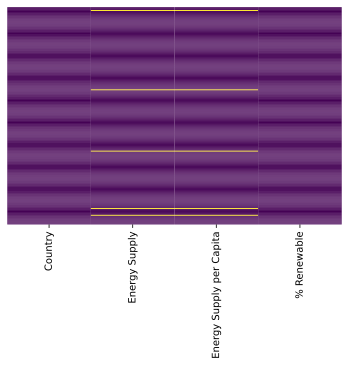

In [16]:
# visualize null data
sns.heatmap(energy.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis') 
# yellow : null

In [45]:
def answer_one():
    import pandas as pd
    import numpy as np

    energy = pd.read_excel('Energy Indicators.xls', skiprows=17,skipfooter= 38)
    energy = energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
    energy['Energy Supply'] = energy['Energy Supply']*1000000
    energy['Country'] = energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States','Iran (Islamic Republic of)':'Iran'})
    energy['Country'] = energy['Country'].str.replace(" \(.*\)","")
    
    GDP = pd.read_csv('world_bank.csv',skiprows=4)
    GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
    GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
    GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')

    columns = ['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    GDP = GDP[columns]
    
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    ScimEn_m = ScimEn[:15]
    
    df = pd.merge(ScimEn_m, energy, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = pd.merge(df,GDP, how = 'inner', left_on = 'Country', right_on='Country Name')
    final_df = final_df.set_index('Country')
    columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    ans = final_df[columns]
    
#     print(len(final_df))
    
    return ans

answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
United States,1,157811,154288,1940563,639345,12.30,333,9.083800e+10,286.0,11.570980,1.381461e+13,1.445186e+13,1.471284e+13,1.444893e+13,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752175e+13,1.821930e+13
China,2,235126,233883,1909601,1306438,8.12,224,1.271910e+11,93.0,19.754910,2.752132e+12,3.550342e+12,4.594307e+12,5.101702e+12,6.087165e+12,7.551500e+12,8.532231e+12,9.570406e+12,1.047568e+13,1.106155e+13
Canada,3,29633,29011,491467,88987,16.59,210,1.043100e+10,296.0,61.945430,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.828689e+12,1.847209e+12,1.803533e+12,1.556130e+12
United Kingdom,4,38873,37780,536378,100038,13.80,208,7.920000e+09,124.0,10.600470,2.713750e+12,3.100882e+12,2.922667e+12,2.410910e+12,2.475244e+12,2.659310e+12,2.704888e+12,2.786023e+12,3.063803e+12,2.928591e+12
Germany,5,32935,32227,367356,78265,11.15,186,1.326100e+10,165.0,17.901530,2.992197e+12,3.421229e+12,3.730028e+12,3.397791e+12,3.396354e+12,3.744409e+12,3.527345e+12,3.732743e+12,3.883920e+12,3.360550e+12
Japan,6,46032,45559,436961,109968,9.49,181,1.898400e+10,149.0,10.232820,4.530377e+12,4.515265e+12,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12
India,7,39893,38848,368175,123446,9.23,171,3.319500e+10,26.0,14.969080,9.402599e+11,1.216735e+12,1.198896e+12,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12
France,8,22429,21913,300015,58151,13.38,169,1.059700e+10,166.0,17.020280,2.318594e+12,2.657213e+12,2.918383e+12,2.690222e+12,2.642610e+12,2.861408e+12,2.683825e+12,2.811078e+12,2.852166e+12,2.438208e+12
Spain,9,18882,18529,312632,56968,16.56,163,4.923000e+09,106.0,37.968590,1.259344e+12,1.472131e+12,1.625225e+12,1.485583e+12,1.420722e+12,1.478773e+12,1.324820e+12,1.354757e+12,1.369399e+12,1.195119e+12


### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [9]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [15]:
def Q2() :
    energy = pd.read_excel('Energy Indicators.xls',skiprows=17,skipfooter=38)   

    # select and rename columns
    energy = energy.iloc[:,2:] # select tail 4 columns 
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    
    # treat '...'values
    energy = energy[['Country','Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN)

    # replace Country name  
    energy = energy.replace({'Country' : r'[\d]+'},{'Country' : ''},regex=True )  # remove CountryName with digitS
    energy = energy.replace({r'\(.*\)' : ' '}, regex=True )   # remove CountryName with ()
    energy = energy.replace(
        {'Country':{"Republic of Korea": "South Korea",
                    "United States of America": "United States",
                    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                    "China, Hong Kong Special Administrative Region": "Hong Kong"}
        })
    
    # GDP From World bank
    GDP = pd.read_csv('world_bank.csv',skiprows=4)
    GDP = GDP.rename(columns={'Country Name':'Country'})
    GDP = GDP.replace({'Country':{"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran","Hong Kong SAR, China": "Hong Kong"}})
    GDP = GDP[['Country','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

    ScimEn = pd.read_excel('scimagojr-3.xlsx')  # 1996-2019
    ScimEn = ScimEn.iloc[:16,:] # Select Rank top 16. Taiwan is excluded in 'energy' dataset  
    
    # merge data1
    data = pd.merge(ScimEn,energy, how='inner').drop(columns='Region')
    data1 = data.merge(GDP, how='left').set_index('Country')
    
    # merge data2
    GDP2 = pd.read_csv('world_bank.csv',skiprows=4)
    GDP2 = GDP2.rename(columns={'Country Name':'Country'})
    GDP2 = GDP2.replace({'Country':{"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran","Hong Kong SAR, China": "Hong Kong"}})
    ScimEn2 = pd.read_excel('scimagojr-3.xlsx')  # 1996-2019
    data = pd.merge(ScimEn2,energy).drop(columns='Region')
    data2 = data.merge(GDP2).set_index('Country')
    
  
    print('Total:',len(data2))
    return len(data2)-len(data1)

Q2()

Total: 169


154

In [7]:
def answer_two():
    import pandas as pd
    import numpy as np

    energy = pd.read_excel('Energy Indicators.xls', skiprows=17,skipfooter= 38)
    energy = energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
    energy['Energy Supply'] = energy['Energy Supply']*1000000
    energy['Country'] = energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States','Iran (Islamic Republic of)':'Iran'})
    energy['Country'] = energy['Country'].str.replace(" \(.*\)","")
    
    GDP = pd.read_csv('world_bank.csv',skiprows=4)
    GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
    GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
    GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')
    
    

    columns = ['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    
    GDP = GDP[columns]
    GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
#     print(GDP)
    
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    ScimEn_m = ScimEn[:15]
    
    df = pd.merge(ScimEn, energy, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = pd.merge(df,GDP, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = final_df.set_index('Country')
    columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    ans = final_df[columns]
    
    df2 = pd.merge(ScimEn, energy, how = 'outer', left_on = 'Country', right_on='Country')
    final_df2 = pd.merge(df2,GDP, how = 'outer', left_on = 'Country', right_on='Country')
    
    print(len(final_df))
#     GDP['Country Name'] = GDP['Country']
    
    print(len(final_df2) - len(final_df))
    
#     return 156

answer_two()

171
150


<br>

Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [5]:
def Q3():
    top15 = Q1()

    # top15.columns.get_loc('2006') # return 10
    top15['avgGDP'] = top15.iloc[:,10:].mean(axis=1)  # select from 2006-2015
    avgGDP = top15.sort_values(by='avgGDP', ascending=False)['avgGDP']
    
    return avgGDP  

Q3()


Country
United States     1.566858e+13
China             6.927702e+12
Japan             5.177131e+12
Germany           3.518657e+12
United Kingdom    2.776607e+12
France            2.687371e+12
Italy             2.139775e+12
Canada            1.613835e+12
India             1.602352e+12
Spain             1.398587e+12
South Korea       1.221372e+12
Australia         1.206526e+12
Turkey            7.860202e+11
Sweden            5.164889e+11
Denmark           3.269309e+11
Name: avgGDP, dtype: float64

In [43]:
def answer_three():     
    import numpy as np
    Top15 = answer_one()
    columns = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    Top15['Mean'] = Top15[columns].mean(axis=1)
    avgGDP = Top15.sort_values(by = 'Mean', ascending = False)['Mean']
    
#     print(avgGDP)
    
    return avgGDP
answer_three()

Country
United States     1.566858e+13
China             6.927702e+12
Japan             5.177131e+12
Germany           3.518657e+12
United Kingdom    2.776607e+12
France            2.687371e+12
Italy             2.139775e+12
Canada            1.613835e+12
India             1.602352e+12
Spain             1.398587e+12
South Korea       1.221372e+12
Australia         1.206526e+12
Turkey            7.860202e+11
Sweden            5.164889e+11
Name: Mean, dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [6]:
def Q4():

    top15 = Q1()  # get top15 dataset
    sixth = Q3().index[5] #return 'France'
    
    change_10y =top15.loc[sixth]['2015']-top15.loc[sixth]['2006']

    return change_10y
Q4()

119614244263.37988

In [57]:
def answer_four():
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    columns = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    Top15['Mean'] = Top15[columns].mean(axis=1)
    avgGDP = Top15.sort_values(by = 'Mean', ascending = False)['Mean']
    target = avgGDP.index[5]
    
    target_data = Top15.loc[target]
    
    ans = target_data['2015'] - target_data['2006']
    
#     print(target_data)
    
    return ans
answer_four()

119614244263.37988

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [59]:
def Q5():
    top15 = Q1()  # get top15 dataset
    mean = top15['Energy Supply per Capita'].mean()
    
    return mean
Q5()

158.46666666666667

In [60]:
def answer_five():
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    target = Top15['Energy Supply per Capita']
    ans = target.mean()

    return ans
answer_five()

160.57142857142858

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [87]:
def Q6():
    top15 = Q1()  # get top15 dataset
    
    max_index = top15['% Renewable'].idxmax() #return 'Canada'
    max_value = top15['% Renewable'].max()
                                     
    return (max_index,max_value)
Q6()    

('Canada', 61.94543)

In [74]:
def answer_six():
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    target = Top15['% Renewable']
    ans = target.max()
    index = Top15[Top15['% Renewable'] == ans].index[0]
    
    return (index, ans)

answer_six()

('Canada', 61.94543)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [86]:
def Q7():
    
    top15 = Q1()  # get top15 dataset
    top15['Ratio'] = top15['Self-citations'] / top15['Citations']
    
    max_index = top15['Ratio'].idxmax()
    max_value  = top15['Ratio'].max()

    return (max_index,max_value)
Q7()

('China', 0.6841418704745127)

In [80]:
def answer_seven():
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    Top15['Ratio'] = Top15['Self-citations'] / Top15['Citations']
    target = Top15['Ratio']
    max_value = target.max()
    max_index = Top15[Top15['Ratio'] == max_value].index[0]
    
#     print(max_index)
    return (max_index, max_value)

answer_seven()

('China', 0.6841418704745127)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [22]:
def Q8():
    top15 = Q1()  # get top15 dataset
    
    top15['Pop'] = top15['Energy Supply'] / top15['Energy Supply per Capita']
    
    top15_sorted = top15.sort_values(by='Pop', ascending=False) 
#     Country = top15_sorted.index[2]  
    Country = top15_sorted.iloc[2].name
    
    return  Country
Q8()

'United States'

In [25]:
def answer_eight():
    Top15 = answer_one()
    columns = ['Energy Supply','Energy Supply per Capita']
    target = Top15[columns]
    target['Captita'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    
    ans = target.sort_values(by = 'Captita', ascending = False).iloc[2].name
    
    return ans
answer_eight()

<ipython-input-25-eb7f3f96011f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Captita'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']


'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [35]:
def Q9():
    top15 = Q1()  # get top15 dataset
    top15['Pop'] = top15['Energy Supply'] / top15['Energy Supply per Capita']
    top15['Citable docs per capita'] = top15['Citable documents'] / top15['Pop']

    co  = top15['Citable docs per capita'].corr(top15['Energy Supply per Capita']) 
    return co 

Q9()


0.49087823375504847

<AxesSubplot:xlabel='Citable docs per Capita', ylabel='Energy Supply per Capita'>

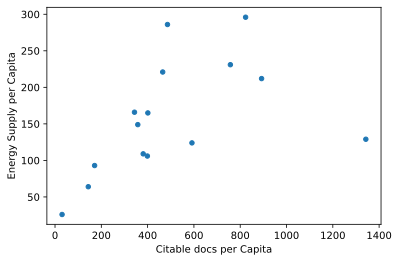

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

top15 = Q1()  # get top15 dataset
top15['Pop'] = top15['Energy Supply'] / top15['Energy Supply per Capita']  # Pop: per milliom
top15['Citable docs per Capita'] = top15['Citable documents'] / top15['Pop']

cor =  top15[['Energy Supply per Capita','Citable docs per Capita']]

cor.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter' )


In [32]:
def answer_nine():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    ans = Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])
    return ans
answer_nine()

0.7813772635815109

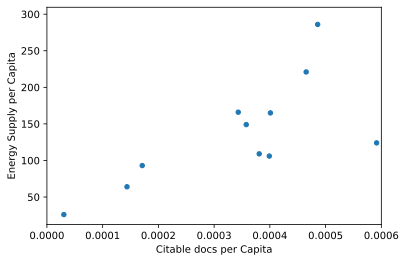

In [53]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
plot9()

In [ ]:
# plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [74]:
def Q10():
    top15 = Q1()  # get top15 dataset
    median = top15['% Renewable'].median()
    top15['HighRenew']= np.where(top15['% Renewable']>median ,1,0) # .where(condition ,true,false)
    
    HighRenew = top15['HighRenew']

    return HighRenew 
Q10()

Country
United States     0
China             1
Canada            1
United Kingdom    0
Germany           0
Japan             0
India             0
France            0
Spain             1
Australia         0
Italy             1
Turkey            1
South Korea       0
Sweden            1
Denmark           1
Name: HighRenew, dtype: int64

In [72]:
def answer_ten():
    import pandas as pd
    Top15 = answer_one()
    med = Top15['% Renewable'].median()
       
    Top15['HighRenew'] = [1 if x >= med else 0 for x in Top15['% Renewable']]
    
#     test = Top15.sort_values(by = 'Rank')['HighRenew']
    
    ans = Top15['HighRenew']

#     print(test)
    
    return pd.Series(ans)
answer_ten()

Country
United States     0
China             1
Canada            1
United Kingdom    0
Germany           1
Japan             0
India             0
France            0
Spain             1
Australia         0
Italy             1
Turkey            1
South Korea       0
Sweden            1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [14]:
def Q11():
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America',
                  'Turkey':'Europe',
                  'Sweden':'Europe',
                  'Denmark':'Europe'}
    
    top15 = Q1()  # get top15 dataset
    top15 = top15.reset_index()
    top15.set_index
#    [ContinentDict['Country'] for Country in ContinentDict]
    
    return top15
Q11()

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,United States,1,157811,154288,1940563,639345,12.30,333,90838.0,286.0,...,1.381461e+13,1.445186e+13,1.471284e+13,1.444893e+13,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752175e+13,1.821930e+13
1,China,2,235126,233883,1909601,1306438,8.12,224,127191.0,93.0,...,2.752132e+12,3.550342e+12,4.594307e+12,5.101702e+12,6.087165e+12,7.551500e+12,8.532231e+12,9.570406e+12,1.047568e+13,1.106155e+13
2,Canada,3,29633,29011,491467,88987,16.59,210,10431.0,296.0,...,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.828689e+12,1.847209e+12,1.803533e+12,1.556130e+12
3,United Kingdom,4,38873,37780,536378,100038,13.80,208,7920.0,124.0,...,2.713750e+12,3.100882e+12,2.922667e+12,2.410910e+12,2.475244e+12,2.659310e+12,2.704888e+12,2.786023e+12,3.063803e+12,2.928591e+12
4,Germany,5,32935,32227,367356,78265,11.15,186,13261.0,165.0,...,2.992197e+12,3.421229e+12,3.730028e+12,3.397791e+12,3.396354e+12,3.744409e+12,3.527345e+12,3.732743e+12,3.883920e+12,3.360550e+12
5,Japan,6,46032,45559,436961,109968,9.49,181,18984.0,149.0,...,4.530377e+12,4.515265e+12,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12
6,India,7,39893,38848,368175,123446,9.23,171,33195.0,26.0,...,9.402599e+11,1.216735e+12,1.198896e+12,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12
7,France,8,22429,21913,300015,58151,13.38,169,10597.0,166.0,...,2.318594e+12,2.657213e+12,2.918383e+12,2.690222e+12,2.642610e+12,2.861408e+12,2.683825e+12,2.811078e+12,2.852166e+12,2.438208e+12
8,Spain,9,18882,18529,312632,56968,16.56,163,4923.0,106.0,...,1.259344e+12,1.472131e+12,1.625225e+12,1.485583e+12,1.420722e+12,1.478773e+12,1.324820e+12,1.354757e+12,1.369399e+12,1.195119e+12
9,Australia,10,18077,17661,263733,44799,14.59,161,5386.0,231.0,...,7.460542e+11,8.530996e+11,1.053996e+12,9.278052e+11,1.146138e+12,1.396650e+12,1.546152e+12,1.576184e+12,1.467484e+12,1.351694e+12


In [82]:
def Q11():
    top15 = Q1() # get top15 dataset
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America',
                  'Turkey':'Europe',
                  'Sweden':'Europe',
                  'Denmark':'Europe'}
    # get index value iteratelly as key, then get value from dict 
    top15['Continent'] = [ContinentDict[country] for country in top15.index]
    top15 = top15.set_index('Continent', append=True) # set 'Continent' as index
    top15 = top15.reset_index('Country')              # drop 'Country' as column

    top15['Pop'] = top15['Energy Supply'] / top15['Energy Supply per Capita']  # Pop: per milliom
    ans = top15['Pop'].groupby('Continent').agg(['size','sum','mean','std'])
    return ans

Q11()


,size,sum,mean,std
Continent,,,,
Asia,4,2821.590756,705.397689,713.877879
Australia,1,23.316017,23.316017,NaN
Europe,8,406.206957,50.775870,28.569860
North America,2,352.855249,176.427625,199.669645


In [76]:
def answer_eleven():
    import pandas as pd
    import numpy as np
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America',
                  'Turkey':'Europe',
                     'Sweden':'Europe'}
    
    Top15 = answer_one()
    
    Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita'])
    
    Top15 = Top15.reset_index()
    Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
#     print(Top15['Continent'])
#     print(ContinentDict.values())
#     Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
    
    target = Top15.set_index('Continent').groupby(level = 0)['PopEst'].agg({'size':np.size, 'sum':np.sum, 'mean':np.mean, 'std':np.std})
    ans = target[['size', 'sum', 'mean', 'std' ]]
    return ans

    
    
answer_eleven()

SpecificationError: nested renamer is not supported

### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [42]:
def Q12():
    top15 = Q1() # get top15 dataset
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America',
                  'Turkey':'Europe',
                  'Sweden':'Europe',
                  'Denmark':'Europe'}
    # get index value iteratelly as key, then get value from dict 
    top15['Continent'] = [ContinentDict[country] for country in top15.index]
    top15 = top15.set_index('Continent', append=True) # set 'Continent' as index

    top15['bins'] = pd.cut(top15['% Renewable'],5)
    ans = top15.groupby(by=['Continent','bins'],observed=True).size()
    # top15.groupby(by=['Continent','bins'])['% Renewable'].count()
    
    return ans 

Q12()

Continent      bins            
Asia           (2.22, 14.213]      2
               (14.213, 26.146]    2
Australia      (2.22, 14.213]      1
Europe         (2.22, 14.213]      1
               (14.213, 26.146]    2
               (26.146, 38.079]    4
               (38.079, 50.012]    1
North America  (2.22, 14.213]      1
               (50.012, 61.945]    1
dtype: int64

In [39]:
def answer_twelve():
    import pandas as pd
    import numpy as np
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America',
                      'Turkey':'Europe',
                  'Sweden':'Europe',
                  'Denmark':'Europe'}
    
    Top15 = answer_one()
    Top15 = Top15.reset_index()
    Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
    Top15['bins'] = pd.cut(Top15['% Renewable'],5)
    
    ans = Top15.groupby(['Continent', 'bins']).size()
    
#     print(Top15['bins'])
    
    return ans
answer_twelve()

Continent      bins            
Asia           (2.22, 14.213]      2
               (14.213, 26.146]    2
               (26.146, 38.079]    0
               (38.079, 50.012]    0
               (50.012, 61.945]    0
Australia      (2.22, 14.213]      1
               (14.213, 26.146]    0
               (26.146, 38.079]    0
               (38.079, 50.012]    0
               (50.012, 61.945]    0
Europe         (2.22, 14.213]      1
               (14.213, 26.146]    2
               (26.146, 38.079]    3
               (38.079, 50.012]    1
               (50.012, 61.945]    0
North America  (2.22, 14.213]      1
               (14.213, 26.146]    0
               (26.146, 38.079]    0
               (38.079, 50.012]    0
               (50.012, 61.945]    1
dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [106]:
def Q13():

    top15 = Q1() # get top15 dataset
    top15['PopEst'] = (top15['Energy Supply'] / top15['Energy Supply per Capita'])*10e5  # Pop: per milliom
 
   # to string 
   #top15['PopEst'].astype(str)  # return objects
   #top15['PopEst'].apply(str)
   #top15['PopEst'].map('{:,.7f}'.format)

    ans  = top15['PopEst'].apply(lambda x: f'{x:,.7f}')  # f-string with  .apply(lambda ) method
        # need iterate by each value, e.g. by apply:
        # https://stackoverflow.com/questions/58602169/why-doesnt-f-strings-formatting-work-for-pandas-dataframes
    
    return ans

Q13()

Country
United States       317,615,384.6153846
China             1,367,645,161.2903228
Canada               35,239,864.8648649
United Kingdom       63,870,967.7419355
Germany              80,369,696.9696970
Japan               127,409,395.9731544
India             1,276,730,769.2307694
France               63,837,349.3975904
Spain                46,443,396.2264151
Australia            23,316,017.3160173
Italy                59,908,256.8807339
Turkey               76,515,625.0000000
South Korea          49,805,429.8642534
Sweden                9,641,509.4339623
Denmark               5,620,155.0387597
Name: PopEst, dtype: object

In [56]:
def answer_thirteen():
    import pandas as pd
    import numpy as np
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    
    Top15 = answer_one()
    
#     print()
    tmp = list()
    Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita'])
    tmp = Top15['PopEst'].tolist()
    
#     print(tmp)
    
    Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).apply(lambda x: "{:,}".format(x), tmp)
    
    ans = pd.Series(Top15['PopEst'])
    
    
    return ans
answer_thirteen()

Country
United States      317,615,384.61538464
China             1,367,645,161.2903225
Canada              35,239,864.86486486
United Kingdom     63,870,967.741935484
Germany             80,369,696.96969697
Japan              127,409,395.97315437
India             1,276,730,769.2307692
France              63,837,349.39759036
Spain                46,443,396.2264151
Australia          23,316,017.316017315
Italy              59,908,256.880733944
Turkey                     76,515,625.0
South Korea        49,805,429.864253394
Sweden              9,641,509.433962265
Name: PopEst, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

ValueError: 'c' argument has 15 elements, which is inconsistent with 'x' and 'y' with size 14.

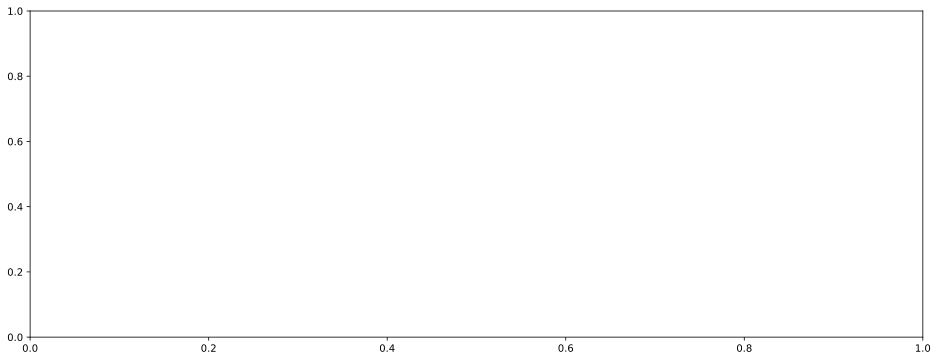

In [108]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

plot_optional()

In [ ]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!